# Reading and Exploring CSV Data with Pandas

The following Python code demonstrates how to load a CSV file using `pandas`, a powerful data analysis library, and display its columns.

### Explanation:
1. **Import pandas**: The `pandas` library is imported as `pd` for convenience.
2. **Specify the file path**: Replace `"my_data.csv"` with the path to your file.
3. **Load the CSV**: Use `pd.read_csv()` to read the data into a `DataFrame`.
4. **Display columns**: The `columns.tolist()` method is used to retrieve and display the list of column names.

In [1]:
import pandas as pd

# Load your Excel file
file_path = "my_data.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)  # Read the Excel file

# Display the columns
print(data.columns.tolist())

['Student Initials', 'Age Range', 'Online Activity Type', 'Website', 'Date', 'Weekday', 'Time Start', 'Time End', 'Time on Activity', 'Title of Movie', ' TV Show OR Name of Item being shopped for', 'Was the media or item recommended by the site?', 'Were you just browsing?', 'Did you look/search for the specific media or item?', 'Genre of media (drama', ' horror', ' suspense', ' comedy', ' etc) OR Type of item (beauty', ' clothing', ' electronic', ' homegoods', ' etc)', 'Recommendation(s) Clicked']


### Explanation:
1. **Import pandas**: The `pandas` library is imported as `pd` for convenience.
2. **Specify the file path**: Update `"my_data.csv"` with the correct path to your file.
3. **Load the CSV file**: Use `pd.read_csv()` to read the data into a `DataFrame`.
4. **Clean column names**: The `str.strip()` method removes any leading or trailing whitespace in column names.
5. **Display the column names**: The `columns.tolist()` method retrieves the cleaned column names for easy viewing.

In [2]:
import pandas as pd

# Load the cleaned data from an Excel file
file_path = "my_data.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)  # Read the Excel file

# Optional: Strip whitespace from column names
data.columns = data.columns.str.strip()

# Display the columns in the dataset
print("Column Names:", data.columns.tolist())

Column Names: ['Student Initials', 'Age Range', 'Online Activity Type', 'Website', 'Date', 'Weekday', 'Time Start', 'Time End', 'Time on Activity', 'Title of Movie', 'TV Show OR Name of Item being shopped for', 'Was the media or item recommended by the site?', 'Were you just browsing?', 'Did you look/search for the specific media or item?', 'Genre of media (drama', 'horror', 'suspense', 'comedy', 'etc) OR Type of item (beauty', 'clothing', 'electronic', 'homegoods', 'etc)', 'Recommendation(s) Clicked']


### Explanation:
1. **Import pandas**: The `pandas` library is imported as `pd` for convenience.
2. **Specify the file path**: Update `"my_data.csv"` with the correct file path.
3. **Read the CSV**: The `pd.read_csv()` function is used to load the file into a `DataFrame`.
4. **Clean column names**: The `str.strip()` method removes leading or trailing whitespace from column names.
5. **Display column names**: Outputs a list of cleaned column names.
6. **Dataset information**: Prints the number of rows, columns, and the data types for each column.
7. **Error handling**: 
   - `FileNotFoundError`: Raised if the file is not found at the specified path.
   - `EmptyDataError`: Raised if the file exists but contains no data.
   - `General Exception`: Catches any other unexpected errors and displays the message.

In [3]:
import pandas as pd

# Load the Excel file
file_path = "my_data.csv"
try:
    # Use read_excel for Excel files
    data = pd.read_csv(file_path)

    # Optional: Strip whitespace from column names
    data.columns = data.columns.str.strip()

    # Display the columns in the dataset
    print("Column Names:", data.columns.tolist())

    # Additional basic information about the dataset
    print("\nDataset Information:")
    print("Number of rows:", len(data))
    print("Number of columns:", len(data.columns))

    # Quick overview of the data types
    print("\nColumn Data Types:")
    print(data.dtypes)

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
    print(f"Error: No data in the file {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Column Names: ['Student Initials', 'Age Range', 'Online Activity Type', 'Website', 'Date', 'Weekday', 'Time Start', 'Time End', 'Time on Activity', 'Title of Movie', 'TV Show OR Name of Item being shopped for', 'Was the media or item recommended by the site?', 'Were you just browsing?', 'Did you look/search for the specific media or item?', 'Genre of media (drama', 'horror', 'suspense', 'comedy', 'etc) OR Type of item (beauty', 'clothing', 'electronic', 'homegoods', 'etc)', 'Recommendation(s) Clicked']

Dataset Information:
Number of rows: 10
Number of columns: 24

Column Data Types:
Student Initials                                        object
Age Range                                               object
Online Activity Type                                    object
Website                                                 object
Date                                                    object
Weekday                                                 object
Time Start                     

### Explanation:

1. **Load Data**:
   - Use `pd.read_csv()` to load data from the CSV file.
   - Remove leading and trailing spaces in column names with `str.strip()`.

2. **Initial Data Check**:
   - Display the first few rows (`data.head()`) and column names for verification.

3. **Duration Calculation**:
   - Convert `Time Start` and `Time End` columns to datetime.
   - Compute the duration for each activity in minutes using the `dt.total_seconds()` method.

4. **Dataset Analysis**:
   - **Total Duration**: Sum up the calculated durations.
   - **Unique Students**: Count distinct values in the `Student Initials` column.
   - **Total Activities**: Get the number of rows in the dataset.
   - **Total Recommendations Clicked**: Sum values in the `Recommendation Clicked` column after converting to numeric.

5. **Metrics**:
   - **Average Time per Student**: Total duration divided by the number of unique students.
   - **Activity Frequency per Student**: Total activities divided by unique students.
   - **Recommendations Clicked Rate**: Recommendations clicked per minute of total duration.

6. **Summary Statistics**:
   - Print descriptive statistics for the `Duration (minutes)` column, if available.

7. **Error Handling**:
   - Handles missing columns gracefully by displaying messages or skipping computations.

In [4]:
import pandas as pd

# Load the cleaned data from an Excel file
file_path = "my_data.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)  # Read the Excel file

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Display the first few rows and column names
print(data.head())
print("Column Names:", data.columns.tolist())  # Check the actual column names

# Check for 'Time Start' and 'Time End' columns and calculate 'Duration (minutes)'
if 'Time Start' in data.columns and 'Time End' in data.columns:
    # Convert 'Time Start' and 'Time End' to datetime
    data['Time Start'] = pd.to_datetime(data['Time Start'], errors='coerce')
    data['Time End'] = pd.to_datetime(data['Time End'], errors='coerce')
    
    # Calculate duration in minutes
    data['Duration (minutes)'] = (data['Time End'] - data['Time Start']).dt.total_seconds() / 60
else:
    print("Time Start or Time End columns are missing.")

# Calculate Total Duration
total_duration = data['Duration (minutes)'].sum() if 'Duration (minutes)' in data.columns else 0

# Check if 'Student Initials' column exists
if 'Student Initials' in data.columns:
    # Calculate Unique Students
    unique_students = data['Student Initials'].nunique()
else:
    print("Column 'Student Initials' is missing.")
    unique_students = 0  # Set to 0 or handle accordingly

# Calculate Total Activities
total_activities = data.shape[0]

# Check for 'Recommendation Clicked' and calculate total
if 'Recommendation Clicked' in data.columns:
    # Convert 'Recommendation Clicked' to numeric, handling errors
    data['Recommendation Clicked'] = pd.to_numeric(data['Recommendation Clicked'], errors='coerce')
    total_recommendations_clicked = data['Recommendation Clicked'].sum()
else:
    print("Column 'Recommendation Clicked' is missing.")
    total_recommendations_clicked = 0

# 1. Average Time Spent on Activities per Student
average_time_per_student = total_duration / unique_students if unique_students > 0 else 0
print(f'Average Time per Student: {average_time_per_student:.2f} minutes')

# 2. Activity Frequency per Student
frequency_per_student = total_activities / unique_students if unique_students > 0 else 0
print(f'Activity Frequency per Student: {frequency_per_student:.2f} activities')

# 3. Recommendations Clicked Rate
recommendations_clicked_rate = total_recommendations_clicked / total_duration if total_duration > 0 else 0
print(f'Recommendations Clicked Rate: {recommendations_clicked_rate:.4f} recommendations per minute')

# Optional: Print summary statistics for duration
if 'Duration (minutes)' in data.columns:
    print("Duration Summary Statistics:")
    print(data['Duration (minutes)'].describe())

  Student Initials Age Range Online Activity Type      Website        Date  \
0               MR     52-56      Online Shopping       Amazon  11/16/2024   
1               MR     52-56   Movie/TV Streaming      Netflix  11/16/2024   
2               MR     52-56      Online Shopping         Etsy  11/17/2024   
3               MR     52-56   Movie/TV Streaming      YouTube  11/17/2024   
4               MR     52-56   Movie/TV Streaming  Disney Plus  11/18/2024   

    Weekday Time Start  Time End Time on Activity           Title of Movie  \
0    Friday    9:00 AM   9:30 AM          30 mins          Gardening tools   
1    Friday    8:00 PM  10:00 PM          2 hours                The Crown   
2  Saturday   11:00 AM  11:20 AM          20 mins  Handmade candle holders   
3  Saturday    7:30 PM   9:00 PM        1.5 hours      Gardening tutorials   
4    Sunday    6:30 PM   9:00 PM        2.5 hours                 Hamilton   

   ... Genre of media (drama horror suspense comedy  \
0  ... 

C:\Users\MLuca\AppData\Local\Temp\ipykernel_10052\1605138246.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time Start'] = pd.to_datetime(data['Time Start'], errors='coerce')
C:\Users\MLuca\AppData\Local\Temp\ipykernel_10052\1605138246.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time End'] = pd.to_datetime(data['Time End'], errors='coerce')


# Analysis and Visualization Script Breakdown

This script analyzes and visualizes data from a CSV file, focusing on metrics like activity durations, unique student participation, and recommendations clicked. Below is a breakdown of its highlights and potential improvements.

---

## **Highlights of the Code**

### **1. Data Validation and Conversion**
- Converts `Time Start` and `Time End` to datetime objects, handling missing or misformatted data using `errors='coerce'`.
- Checks for required columns (e.g., `Student Initials`, `Recommendations Clicked`) before performing calculations, ensuring the script doesn't fail unexpectedly.

### **2. Descriptive Analytics**
- **Calculations**:
  - Average time spent per student.
  - Activity frequency per student.
  - Recommendations clicked rate.
- Provides summary statistics for activity durations using `describe()`.

### **3. Visualizations**
- **Bar Chart**: Displays total time spent per online activity type.
- **Pie Chart**: Illustrates the distribution of online activity types.
- **Histogram**: Visualizes the distribution of activity durations.

### **4. Error Handling**
- Ensures missing columns or data are handled gracefully, with warnings printed for missing columns.

---

## **Potential Improvements**

### **1. Ensure Column Name Consistency**
- Strip leading or trailing spaces from column names:
  ```python
  data.columns = data.columns.str.strip()


Column 'Recommendations Clicked' not found. Recommendations Clicked calculations skipped.
Average Time per Student: 745.00 minutes
Activity Frequency per Student: 10.00 activities
Recommendations Clicked Rate: 0.0000 recommendations per minute
Duration Summary Statistics:
count     10.000000
mean      74.500000
std       54.285766
min       20.000000
25%       30.000000
50%       60.000000
75%      116.250000
max      150.000000
Name: Duration (minutes), dtype: float64


C:\Users\MLuca\AppData\Local\Temp\ipykernel_10052\2725379153.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time Start'] = pd.to_datetime(data['Time Start'], errors='coerce')
C:\Users\MLuca\AppData\Local\Temp\ipykernel_10052\2725379153.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time End'] = pd.to_datetime(data['Time End'], errors='coerce')


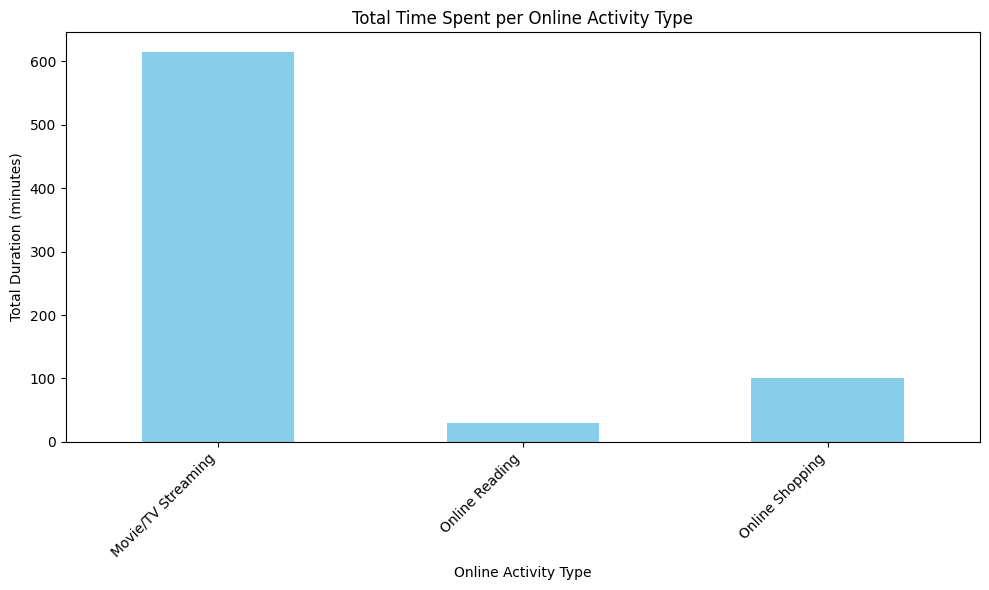

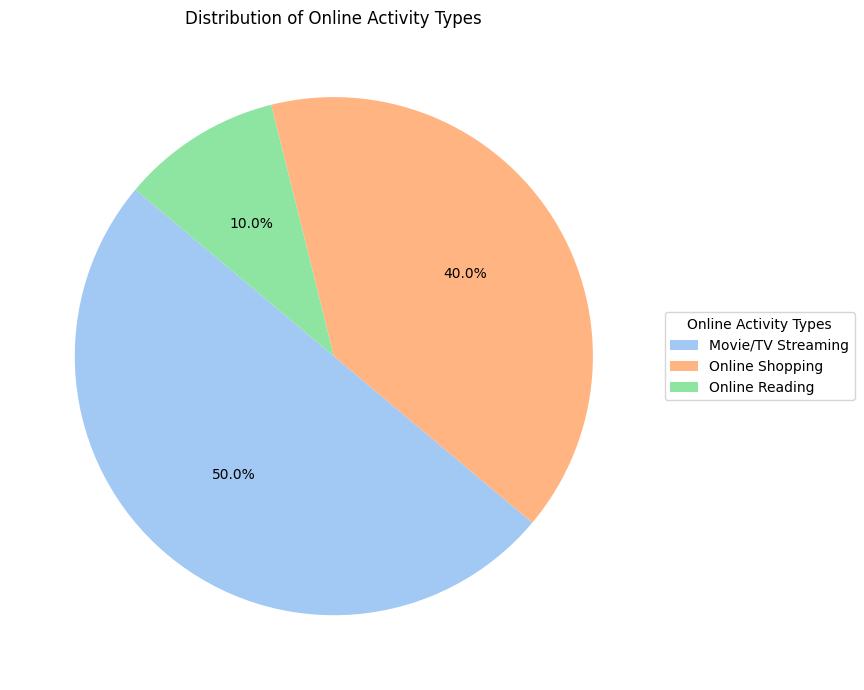

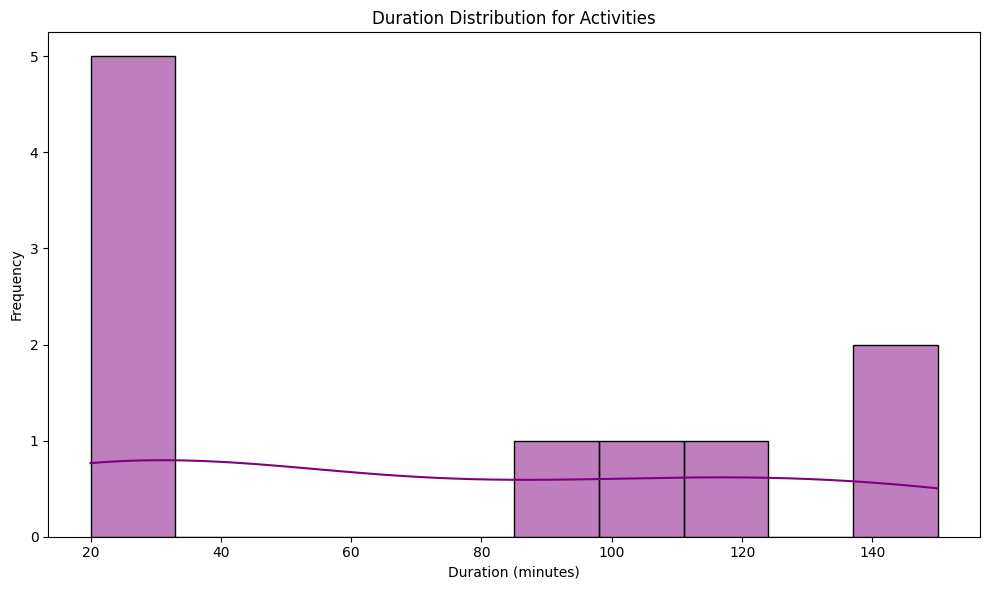

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV file
file_path = "my_data.csv"
data = pd.read_csv(file_path)

# Convert 'Time Start' and 'Time End' to datetime (if necessary)
if data['Time Start'].dtype == 'object' and data['Time End'].dtype == 'object':
    data['Time Start'] = pd.to_datetime(data['Time Start'], errors='coerce')
    data['Time End'] = pd.to_datetime(data['Time End'], errors='coerce')

# Calculate Duration in minutes
data['Duration (minutes)'] = (data['Time End'] - data['Time Start']).dt.total_seconds() / 60

# Calculate Total Duration
total_duration = data['Duration (minutes)'].sum()

# Calculate Unique Students (assuming 'Student Initials' column exists)
if 'Student Initials' in data.columns:
    unique_students = data['Student Initials'].nunique()
else:
    print("Column 'Student Initials' is missing. Cannot calculate unique students.")
    unique_students = 0

# Calculate Total Activities
total_activities = data.shape[0]

# Calculate Total Recommendations Clicked
if 'Recommendations Clicked' in data.columns:
    total_recommendations_clicked = data['Recommendations Clicked'].sum()
else:
    print("Column 'Recommendations Clicked' not found. Recommendations Clicked calculations skipped.")
    total_recommendations_clicked = 0

# 1. Average Time Spent on Activities per Student
average_time_per_student = total_duration / unique_students if unique_students > 0 else 0
print(f'Average Time per Student: {average_time_per_student:.2f} minutes')

# 2. Activity Frequency per Student
frequency_per_student = total_activities / unique_students if unique_students > 0 else 0
print(f'Activity Frequency per Student: {frequency_per_student:.2f} activities')

# 3. Recommendations Clicked Rate (if applicable)
recommendations_clicked_rate = total_recommendations_clicked / total_duration if total_duration > 0 else 0
print(f'Recommendations Clicked Rate: {recommendations_clicked_rate:.4f} recommendations per minute')

# Optional: Print summary statistics for duration
print("Duration Summary Statistics:")
print(data['Duration (minutes)'].describe())

# Visualizations

# Bar Chart: Total time spent per Online Activity Type
if 'Online Activity Type' in data.columns:
    activity_time = data.groupby('Online Activity Type')['Duration (minutes)'].sum()
    plt.figure(figsize=(10, 6))
    activity_time.plot(kind='bar', color='skyblue')
    plt.title('Total Time Spent per Online Activity Type')
    plt.ylabel('Total Duration (minutes)')
    plt.xlabel('Online Activity Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Online Activity Type' not found. Skipping bar chart generation.")

# Pie Chart: Distribution of Online Activity Types
if 'Online Activity Type' in data.columns:
    plt.figure(figsize=(12, 7))
    activity_counts = data['Online Activity Type'].value_counts()
    colors = sns.color_palette("pastel")

    # Create the pie chart with percentages
    wedges, texts, autotexts = plt.pie(activity_counts, colors=colors, autopct='%1.1f%%', startangle=140)

    plt.title('Distribution of Online Activity Types')

    # Create a legend on the side
    plt.legend(wedges, activity_counts.index, 
               title="Online Activity Types", 
               loc="center left", 
               bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()
else:
    print("Column 'Online Activity Type' not found. Skipping pie chart generation.")

# Histogram: Duration distribution for activities
plt.figure(figsize=(10, 6))
sns.histplot(data['Duration (minutes)'].dropna(), bins=10, kde=True, color='purple')
plt.title('Duration Distribution for Activities')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Citations

1. **Pandas**: 
   - The pandas library for data manipulation and analysis. Retrieved from [https://pandas.pydata.org/](https://pandas.pydata.org/)

2. **Seaborn**: 
   - Seaborn is a Python data visualization library based on matplotlib. Retrieved from [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

3. **Matplotlib**: 
   - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Retrieved from [https://matplotlib.org/](https://matplotlib.org/)

4. **NumPy**: 
   - NumPy is the fundamental package for scientific computing with Python. Retrieved from [https://numpy.org/](https://numpy.org/)
